In [1]:
import numpy as np
from sklearn import linear_model
from __future__ import print_function

In [9]:
x = np.array([[1,2],[3,4], [5,6]])
y = np.array([0] * 18).reshape(3, 3, 2)
print(x)

[[1 2]
 [3 4]
 [5 6]]


In [8]:
a = np.repeat(x, 3, axis = 0)
print(a)
print(a.shape)
b = a.reshape(x.shape[0], 3, x.shape[1])
print (b)
print (b.shape)

[[1 2]
 [1 2]
 [1 2]
 [3 4]
 [3 4]
 [3 4]
 [5 6]
 [5 6]
 [5 6]]
(9, 2)
[[[1 2]
  [1 2]
  [1 2]]

 [[3 4]
  [3 4]
  [3 4]]

 [[5 6]
  [5 6]
  [5 6]]]
(3, 3, 2)


In [25]:
c = np.concatenate((y, b), axis = 2).reshape(36,1)

In [35]:
c.reshape(-1).shape

(36,)

In [2]:
n_samples, n_features = 10, 5
np.random.seed(0)
y = np.random.randn(n_samples)
X = np.random.randn(n_samples, n_features)


In [3]:
print(X.shape, y.shape)

(10, 5) (10,)


In [4]:
clf = linear_model.SGDRegressor()


In [5]:
clf.fit(X, y)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [6]:
((clf.predict(X) - y)**2).sum()

10.511309694328974

In [7]:
((y.mean() - y)**2).sum()

9.3524220050028379

In [8]:
import matplotlib.pyplot as plt 

In [9]:
%matplotlib inline

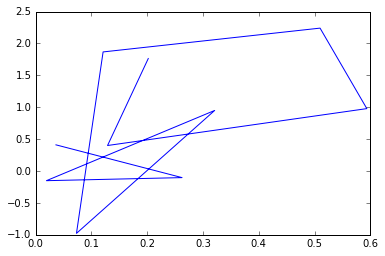

In [11]:
plt.plot(clf.predict(X), y)

In [18]:
arr = np.arange(10)
print(arr)

[0 1 2 3 4 5 6 7 8 9]


In [19]:
np.random.shuffle(arr)

In [20]:
print(arr)

[5 9 8 7 1 3 6 0 2 4]


In [21]:
m = np.arange(10) * 10
print(arr)

[5 9 8 7 1 3 6 0 2 4]


In [22]:
m[arr]

array([50, 90, 80, 70, 10, 30, 60,  0, 20, 40])

In [30]:
middle_layer = [1, 2 ,3 ] 
test_list = [-1] + middle_layer + [170]

In [31]:
for layer in test_list:
    print (layer)

-1
1
2
3
170


In [46]:
arr = np.array([[1, 2, 3], [4, 5, 6]])
print(arr.shape)

(2, 3)


In [52]:
arr[1:2, :].shape

(1, 3)

In [77]:
import tensorflow as tf
from tensorflow.python.ops import rnn_cell, rnn

In [78]:
lstm = rnn_cell.BasicLSTMCell(7, state_is_tuple=True)
print(lstm.state_size)

LSTMStateTuple(c=7, h=7)


In [1]:
init_scale = 0.1
input_data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 2, 3, 4, 5]
target = [2, 3, 4, 5, 6, 7, 8, 9, 10, 9, 8, 7 ,6, 5, 4, 3, 2, 1, 2, 3, 4, 5, 6]

n_features = 1
n_steps = 3
batch_size = 1
n_labels = 1
n_hidden = 10

graph = tf.Graph()
with graph.as_default():
    inputs = tf.placeholder("float32", [None, n_steps, n_features])
    labels = tf.placeholder("float32", [None, n_labels])
    
    weights = {
        'hidden': tf.Variable(tf.random_normal([n_features, n_hidden])),
        'out': tf.Variable(tf.random_normal([n_hidden, n_labels]))
    }
    biases = {
        'hidden': tf.Variable(tf.random_normal([n_hidden])),
        'out': tf.Variable(tf.random_normal([n_labels]))
    }
    
    def RNN(x, w, b):
        # Prepare data shape to match `rnn` function requirements
        # Current data input shape: (batch_size, n_steps, n_input)
        # Required shape: 'n_steps' tensors list of shape (batch_size, n_hidden)
    
        # Permuting batch_size and n_steps
        x = tf.transpose(x, [1, 0, 2])
        # Reshaping to (n_steps*batch_size, n_input)
        x = tf.reshape(x, [-1, n_features])
        
        # Linear activation
        x = tf.matmul(x, w['hidden']) + b['hidden']
        # Split to get a list of 'n_steps' tensors of shape (batch_size, n_hidden)
        x = tf.split(0, n_steps, x)

        # Define a lstm cell with tensorflow
        lstm_cell = rnn_cell.BasicLSTMCell(n_hidden, forget_bias=1.0, state_is_tuple=True)

        # Get lstm cell output
        outputs, states = rnn.rnn(lstm_cell, x, dtype=tf.float32)

        # Linear activation, using rnn inner loop last output
        return tf.matmul(outputs[-1], w['out']) + b['out']
    
    pred = RNN(inputs, weights, biases)
    
    # Define loss and optimizer
    loss = tf.reduce_mean(tf.square(pred - labels))
    op = tf.train.AdamOptimizer(0.001).minimize(loss)

NameError: name 'tf' is not defined

In [141]:
steps = 10000
with tf.Session(graph=graph) as session:
    tf.initialize_all_variables().run()
    print('Initialized')
    for step in range(steps):
        off = step * batch_size % (24 - n_steps)
        temp = np.array(input_data[off:off+n_steps])
        batch_data = temp.reshape(1, 3, 1)
        batch_label = np.array(target[off+n_steps - 1]).reshape(1, -1)
        feed_dict = {inputs:batch_data, labels:batch_label}
        p, l, _ = session.run([pred, loss, op], feed_dict=feed_dict)
        if step % 100 == 0:
            print('loss = %f' % (l))
            print('batch_data = %d %d %d, batch_label = %d, predicate = %f' % (batch_data[0, 0, 0],batch_data[0, 1, 0],batch_data[0, 2, 0], batch_label[0, 0], p))

Initialized
loss = 28.400396
batch_data = 1 2 3, batch_label = 4, predicate = -1.329202
loss = 0.384000
batch_data = 3 2 1, batch_label = 2, predicate = 2.619677
loss = 0.028927
batch_data = 8 7 6, batch_label = 5, predicate = 5.170081
loss = 10.897052
batch_data = 7 8 9, batch_label = 10, predicate = 6.698932
loss = 0.319618
batch_data = 2 3 4, batch_label = 5, predicate = 4.434652
loss = 0.234942
batch_data = 2 1 2, batch_label = 3, predicate = 2.515292
loss = 2.838127
batch_data = 7 6 5, batch_label = 4, predicate = 5.684674
loss = 2.012923
batch_data = 8 9 10, batch_label = 9, predicate = 7.581225
loss = 0.354192
batch_data = 3 4 5, batch_label = 6, predicate = 5.404860
loss = 0.053954
batch_data = 1 2 3, batch_label = 4, predicate = 3.767720
loss = 0.299292
batch_data = 6 5 4, batch_label = 3, predicate = 3.547076
loss = 0.001814
batch_data = 9 10 9, batch_label = 8, predicate = 7.957404
loss = 0.558760
batch_data = 4 5 6, batch_label = 7, predicate = 6.252498
loss = 0.000799
batc

In [114]:
for step in range(0, 10):
    off = step * batch_size % (11 - n_steps)
    temp = np.array(target[off + n_steps - 1])
    batch = temp.reshape(1, -1)
    print(batch.shape)

(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)


In [37]:
import time
start_time = time.time()
du = time.time() - start_time
print(du)

8.29696655273e-05
